<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/MatrizDeCorrelacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
personas = pd.read_csv('sample_data/personas.csv')
personas

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4
...,...,...,...,...,...
995,169.059462,109.612155,9998.522402,41.110352,4
996,151.873081,91.697127,6867.097603,40.617061,5
997,131.156800,78.301155,9757.539280,40.798085,4
998,156.454396,94.163603,11044.031510,41.443604,3


In [5]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   altura            1000 non-null   float64
 1   peso              1000 non-null   float64
 2   ingreso           1000 non-null   float64
 3   horas_trabajadas  1000 non-null   float64
 4   ausencias         1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [6]:
personas.describe()

,altura,peso,ingreso,horas_trabajadas,ausencias
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,149.951455,85.474510,10077.306402,41.275829,3.587000
std,19.748345,21.091609,2490.167110,0.525277,1.264923
min,92.494081,28.431261,1783.853217,39.930111,-1.000000
25%,137.055102,72.812153,8407.200717,40.905475,3.000000
50%,150.338618,84.891180,10072.833245,41.270119,4.000000
75%,162.905948,99.956094,11689.680823,41.638858,4.000000
max,210.607163,154.046500,20032.236920,43.031858,8.000000


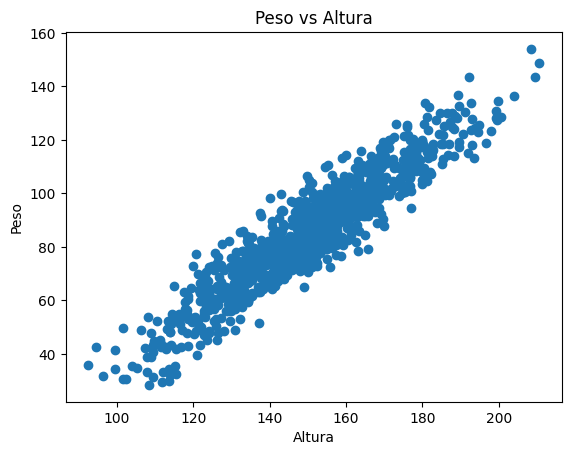

In [7]:
plt.scatter(personas['altura'],personas['peso'])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Peso vs Altura')
plt.show()

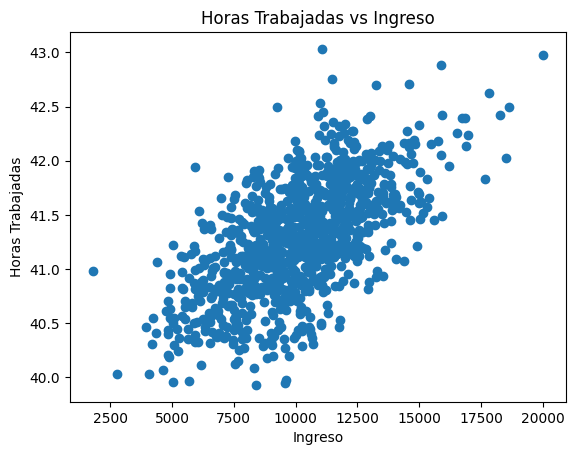

In [8]:
plt.scatter(personas['ingreso'],personas['horas_trabajadas'])
plt.xlabel('Ingreso')
plt.ylabel('Horas Trabajadas')
plt.title('Horas Trabajadas vs Ingreso')
plt.show()

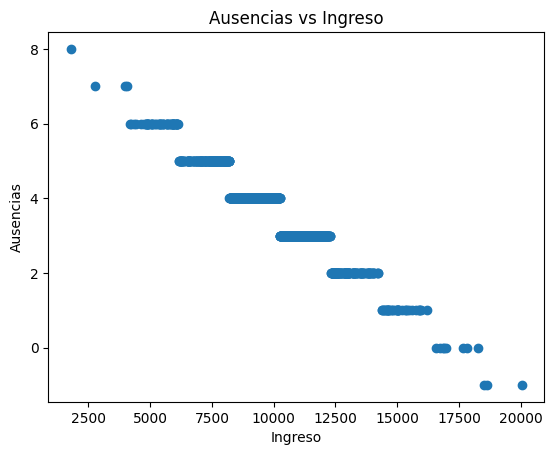

In [9]:
plt.scatter(personas['ingreso'],personas['ausencias'])
plt.xlabel('Ingreso')
plt.ylabel('Ausencias')
plt.title('Ausencias vs Ingreso')
plt.show()

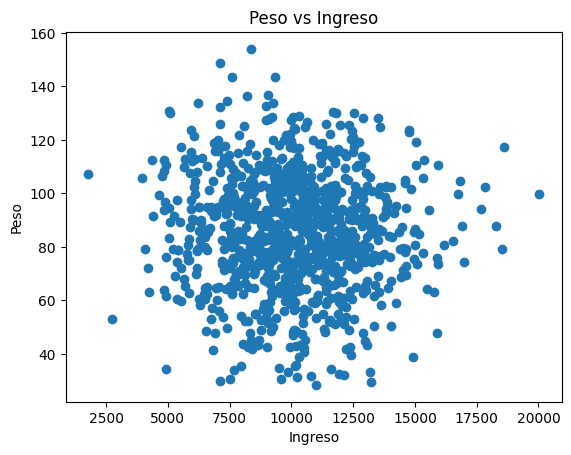

In [10]:
plt.scatter(personas['ingreso'],personas['peso'])
plt.xlabel('Ingreso')
plt.ylabel('Peso')
plt.title('Peso vs Ingreso')
plt.show()

In [11]:
# matriz de correlacion
matriz=personas.corr()
matriz

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.930608,-0.025283,0.008547,0.025587
peso,0.930608,1.000000,-0.029852,-0.002483,0.027450
ingreso,-0.025283,-0.029852,1.000000,0.625514,-0.973104
horas_trabajadas,0.008547,-0.002483,0.625514,1.000000,-0.603870
ausencias,0.025587,0.027450,-0.973104,-0.603870,1.000000


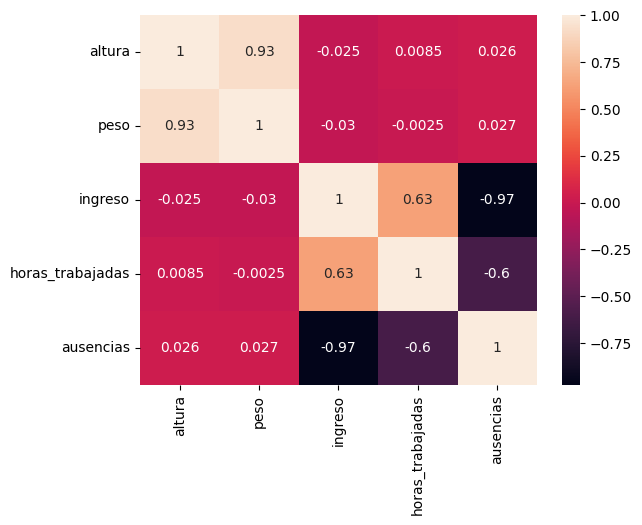

In [12]:
# mapa de calor
sns.heatmap(matriz,annot=True)
plt.show()

In [13]:
from sklearn import preprocessing
datos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Data = pd.DataFrame(datos,columns=['datos'])
Data



,datos
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [17]:
# datos numericos en la misma escala
escala=preprocessing.StandardScaler()
datos_standard_scaler = escala.fit_transform(Data)
datos_standard_scaler
escala.inverse_transform(datos_standard_scaler)

# Muestra los atributos
print(escala.scale_)
print(escala.mean_) # Valor medio de cada característica
print(escala.n_samples_seen_) # Número de muestras procesadas
print(escala.var_) # La varianza de cada característica
print(escala.feature_names_in_ ) # Nombre características

[2.87228132]
[5.5]
10
[8.25]
['datos']


In [16]:
# minimo y maximo
escala2=preprocessing.StandardScaler()
datos_min_max_scaler = escala2.fit_transform(Data)
datos_min_max_scaler

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [22]:
# para rellenar con la media
df=pd.DataFrame([[10,8,9,5,np.nan,5],[4,np.nan,2,7,8,2],[np.nan,6,1,8,9,0,9],[4,np.nan,2,4,78,2]])
df

from sklearn.impute import SimpleImputer
print(df.mean()) # medias por columna
simpleimputer=SimpleImputer(missing_values=np.nan,strategy='mean')
simpleimputer.fit_transform(df)
# estadística
simpleimputer.statistics_

0     6.000000
1     7.000000
2     3.500000
3     6.000000
4    31.666667
5     2.250000
6     9.000000
dtype: float64


array([ 6.        ,  7.        ,  3.5       ,  6.        , 31.66666667,
        2.25      ,  9.        ])

In [ ]:
# para rellenar con un valor concreto
df=pd.DataFrame([[10,8,9,5,np.nan,5],[4,np.nan,2,7,8,2],[np.nan,6,1,8,9,0,9],[4,np.nan,2,4,78,2]])
df

from sklearn.impute import SimpleImputer
print(df.mean()) # medias por columna
simpleimputer=SimpleImputer(missing_values=np.nan,strategy='constan', fill_value=3)
simpleimputer.fit_transform(df)
# estadística
simpleimputer.statistics_